# Predicting the count of total rental bikes using (#replace with the methods you guys decide to use here)
### Group 24
Jialu Jin (24403594)
<br> your name&sid here
<br> your name&sid here
<br> your name&sid here

# Introduction
## Bike Sharing Dataset:
Here are two CSV files in the link below, one called day.csv, and the other called hour.csv. 
<br>We will be **using only day.csv file**; thus, we will only provide the dataset description and questions focusing on this dataset.
- Link: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset
- There are 731 observations and 16 variables in our dataset.
- Description of the 16 variables:
    - instant (numerical): record index 
    - dteday (date): date
    - season (categorical): season (1:springer, 2:summer, 3:fall, 4:winter)
    - yr (categorical): year (0: 2011, 1:2012)
    - mnth (categorical): month ( 1 to 12)
    - holiday (categorical): weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    - weekday (categorical): day of the week
    - workingday (categorical): if day is neither weekend nor holiday is 1, otherwise is 0.
    - weathersit (categorical): 
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    - temp (numerical): Normalized temperature in Celsius. The values are divided to 41 (max)
    - atemp (numerical): Normalized feeling temperature in Celsius. The values are divided to 50 (max)
    - hum (numerical): Normalized humidity. The values are divided to 100 (max)
    - windspeed (numerical): Normalized wind speed. The values are divided to 67 (max)
    - casual (numerical): count of casual users
    - registered (numerical): count of registered users
    - cnt (numerical): count of total rental bikes including both casual and registered

The fundamental dataset pertains to the two-year historical record, covering the years 2011 and 2012, of the Capital Bikeshare system in Washington D.C., USA. This data is accessible to the public on the http://capitalbikeshare.com/system-data website. The information in this dataset was compiled on both a two-hourly and daily basis, and subsequently, relevant weather and seasonal data were gathered and incorporated. The weather details were obtained from http://www.freemeteo.com.

## Question:
- Question: 
    - What is the expected count of total rental bikes given relevant environmental/seasonal variables?
    - Response variable: count of total rental bikes including both casual and registered (cnt)
- Describe clearly how the data will help you address the question of interest. 
    - Many variables like temp, atemp, hum, windspeed, and season, etc can be used as explanatory variables in the regression model, then the regression model can be used to make the prediction.
- Explain whether your question is focused on prediction, inference, or both.
    - The main purpose of solving the problem I suggested is to help the company prepare the right amount of bikes every day (to avoid shortage or surplus), so the question is focused on prediction.

# EDA
### Demonstrate that the dataset can be read from the web into R
- We have created a Github repository for our group use and uploaded the dataset. It can now be read from the repository into R.

In [1]:
day <- read.csv("https://raw.githubusercontent.com/JialuJin/STAT_301_Project/main/day.csv")
head(day)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


### Clean and wrangle the data into a tidy format
- The data is already in a tidy format
    - Each variable forms a column
    - Each observation forms a row
    - The dataset includes variable names
- But we can still clean our data by dropping the redundant columns
    - Since our response variable is cnt (count of total rental bikes) which is the sum of `casual` and `registered` columns, we can drop these two columns.
    - Since `instant` is unique for each row of observation, it is also redundant for my task, we can drop this column as well.

In [2]:
library(dplyr)
day <- day %>%
    select(-casual, -registered, -instant)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### A visualization that is relevant to explore the data
- We chose to explore the relationship between the count of total rental bikes and the date.

In [3]:
data_type <- class(day$dteday)
print(data_type)

[1] "character"


- Convert the dteday column into Date type.

In [4]:
day$dteday <- as.Date(day$dteday)
# Verify the data type conversion
str(day)

'data.frame':	731 obs. of  13 variables:
 $ dteday    : Date, format: "2011-01-01" "2011-01-02" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


- Use a line plot to visualize the relationship between  the count of total rental bikes and the date (cnt & dteday)

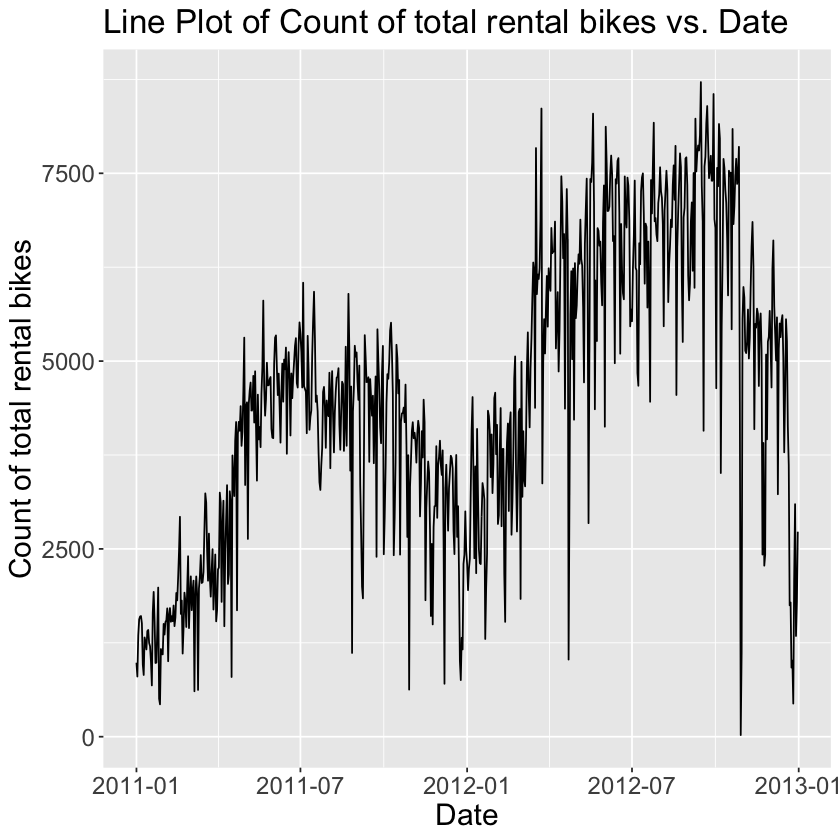

In [6]:
library(ggplot2)

ggplot(data = day, aes(x = dteday, y = cnt)) +
    geom_line() +
    labs(x = "Date", y = "Count of total rental bikes", title = "Line Plot of Count of total rental bikes vs. Date") + 
    theme(
        text = element_text(size = 18),  # Adjust the text size here
        plot.title = element_text(size = 20),  # Modify the title text size
        axis.title.x = element_text(size = 18),  # Adjust the x-axis label text size
        axis.title.y = element_text(size = 18)   # Adjust the y-axis label text size
  )

- We found that there are both `seasonal effects` and an `upward trend` in the data. 
- We will not explore these further since this course doesn't cover these two topics. 
- But relating this back to our data, we could guess that **the count of total rental bikes might be associated with `yr`, `season` or `mnth`** (year, season, or month).

### A high quality plot
- Knowing the correlation coefficients between each pair of variables is very important before fitting a linear regression model.
- My task is to use a linear regression model to predict the count of total rental bikes
- I use ggpairs() below to find the correlation coefficients between each pair of the variables so that I can select which variables to use in the model to maximize its prediction accuracy.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



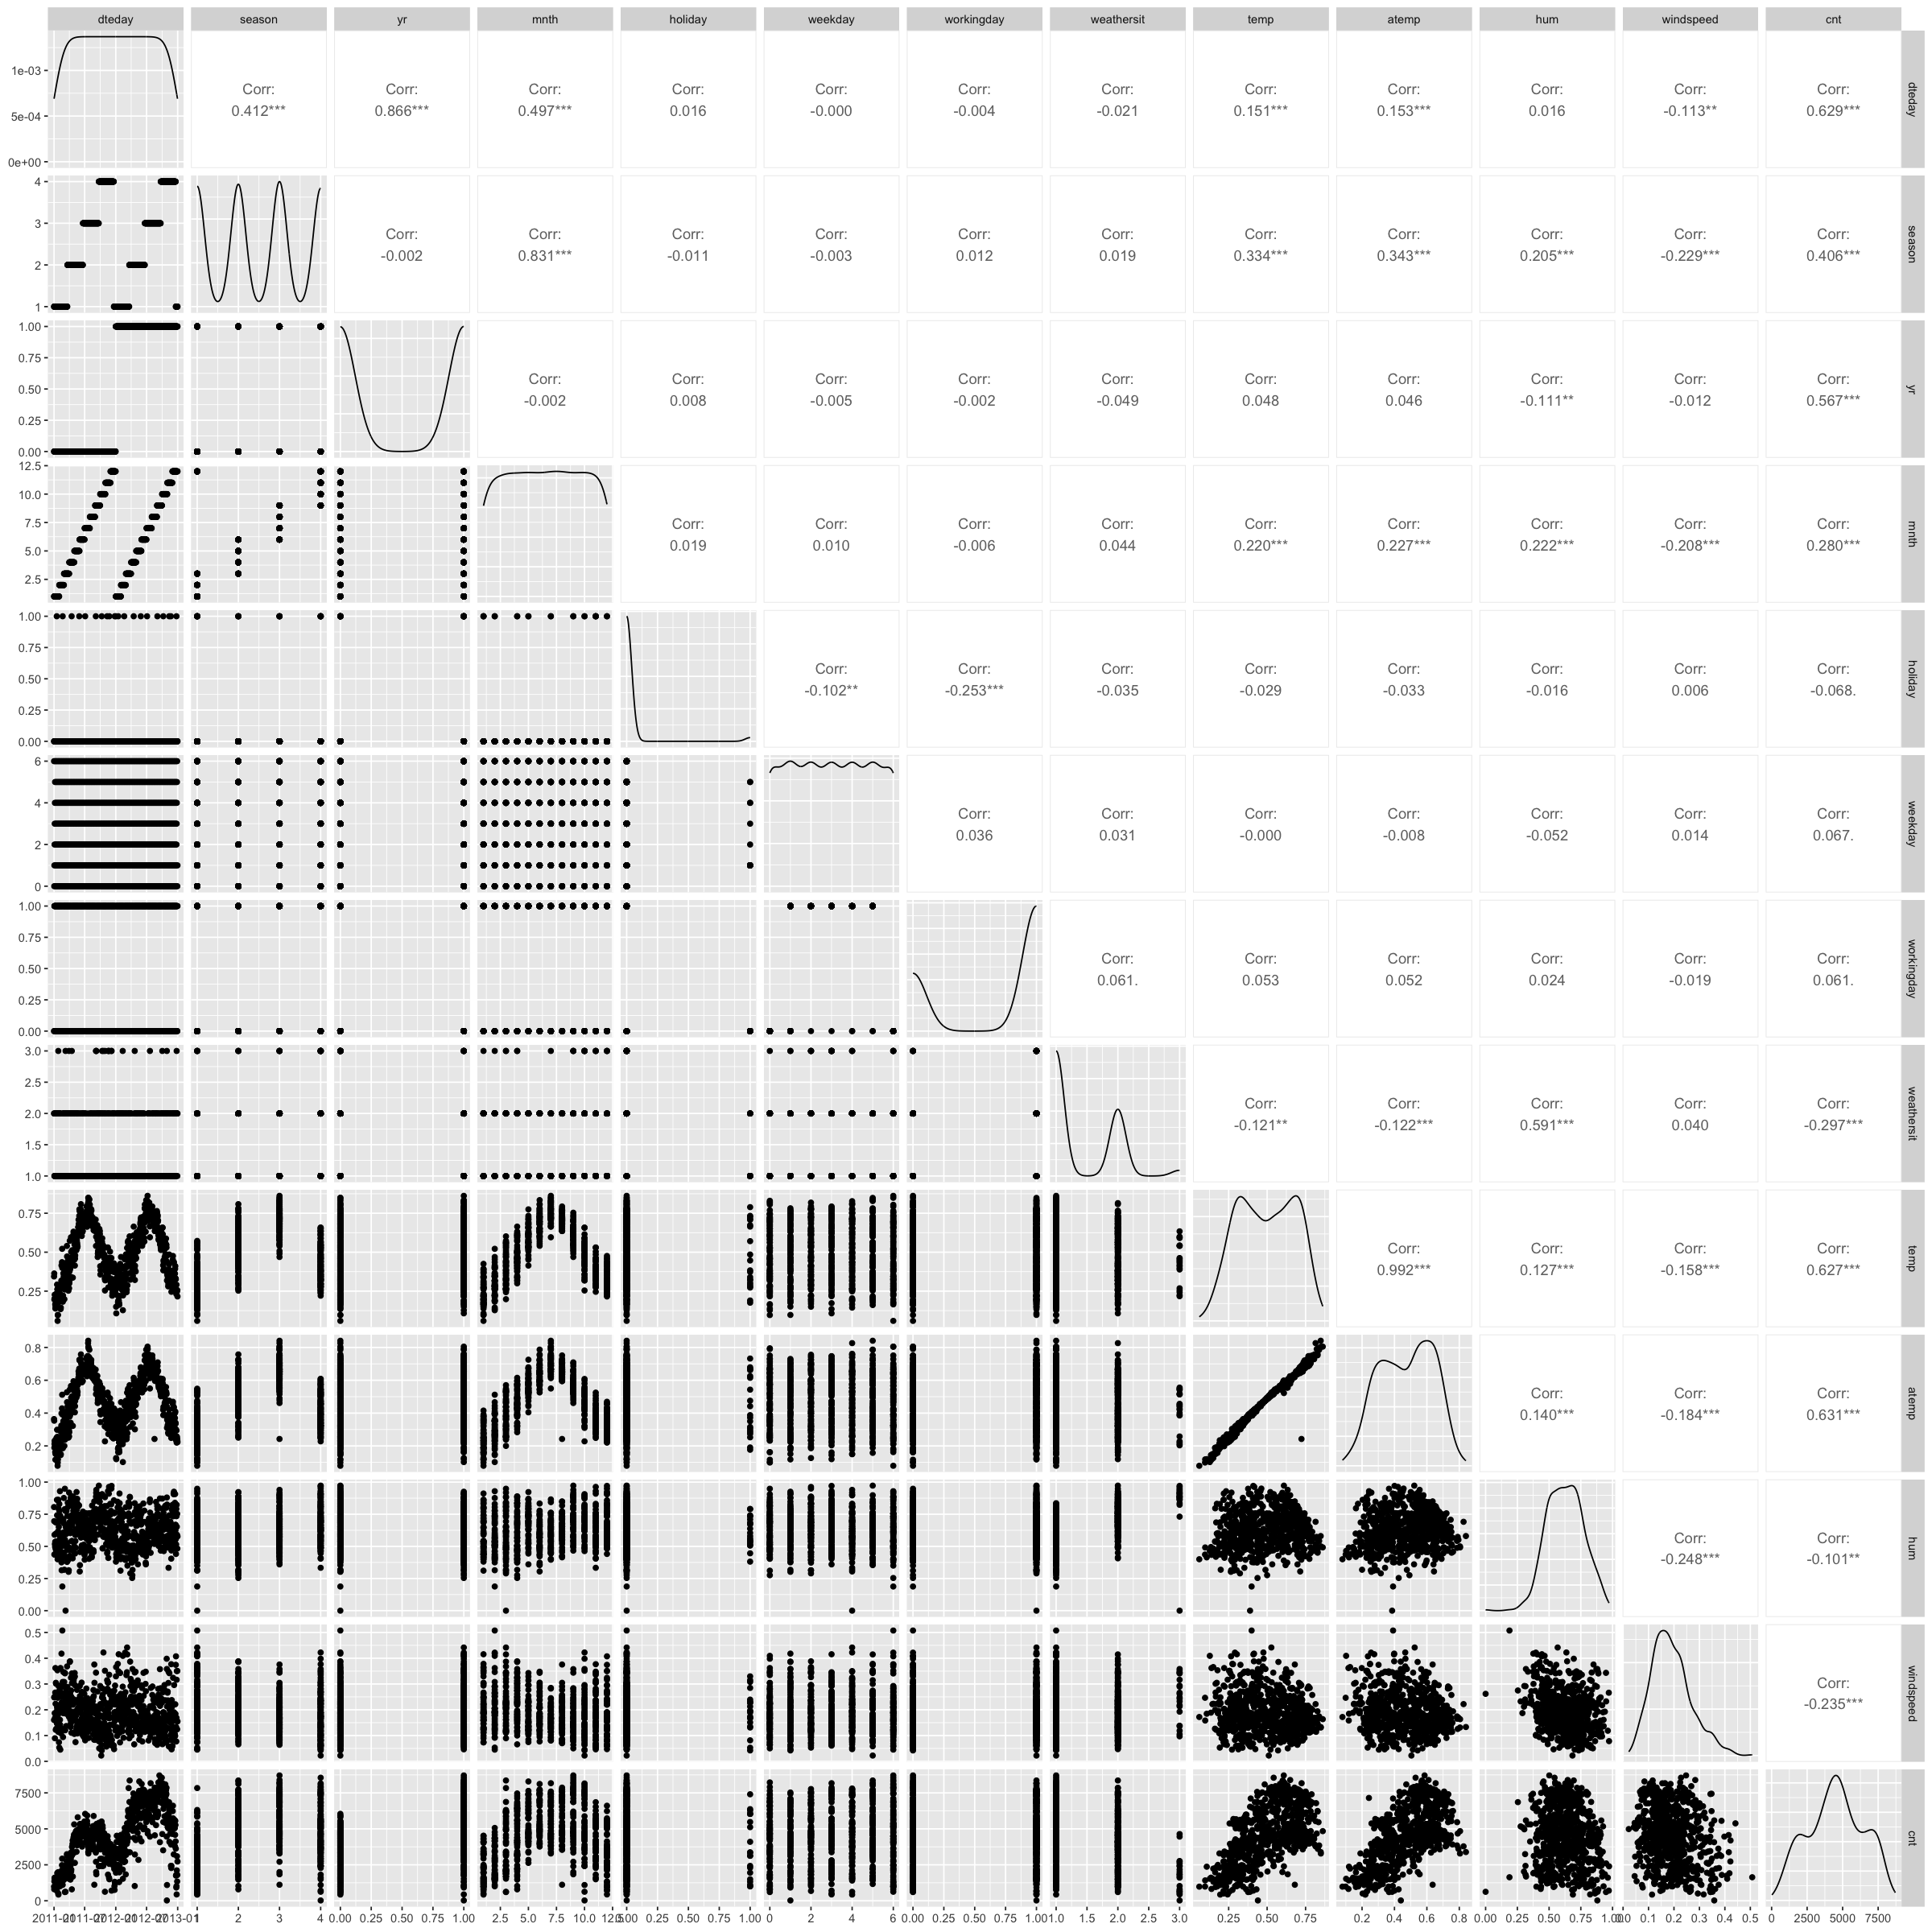

In [7]:
library(GGally)
options(
  repr.plot.width = 20,    # Set the width of the plot
  repr.plot.height = 20    # Set the height of the plot
)
ggpairs(day)

From the above plot, We found that:
- `dteday` and `cnt` is highly positively correlated with correlation coefficient of 0.629
- `yr` and `cnt` is moderately positively correlated with correlation coefficient of 0.567
- `temp` and `cnt` is highly positively correlated with correlation coefficient of 0.627
- `atemp` and `cnt` is moderately positively correlated with correlation coefficient of 0.631
<br>

- `dteday` and `yr` is highly positively correlated with correlation coefficient of 0.866
- `mnth` and `season` is highly positively correlated with correlation coefficient of 0.831
- `weathersit` and `hum` is moderately positively correlated with correlation coefficient of 0.591
- `temp` and `atemp` is highly positively correlated with correlation coefficient of 0.992

### Conclusion from EDA
- From the result of the correlation coefficients, when fitting the linear regression model, I will consider `dteday`, `year`, `temp`, and `atemp` first since they have the highest correlation with the response variable cnt.
- Recall from the line plot, I found that there are both seasonal effects and an upward trend in our data, which indicates that besides `dteday` and `yr`, the response variable `cnt` might also be associated with `season` and `mnth`. So I would also try a linear regression model with these two variables included.
- However, due to the **existence of multicollinearity** (high correlation between some of the explanatory variables), I will highly likely need to adjust the model further. For example, I will probably need to remove either `temp` or `atemp` based on the result of `vif()` function.

# Method & Implementation
- Remember to include all necessary libraries
- Creative visualization (dont do ggpairs)

# Conclusion & Discussion
- other cool things that you tried or want to try but could not include due to limited space allowed
- a thoughtful discussion about the limitations of your analyses!!